# Exploring Data:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full_grid = pd.read_csv("resampled_full_grid.csv", parse_dates = ["time"])

In [3]:
full_grid.head()

,time,grid_square,internet_cdr
0,2013-11-01 00:00:00,1,11.028366
1,2013-11-01 00:10:00,1,11.100963
2,2013-11-01 00:20:00,1,10.892771
3,2013-11-01 00:30:00,1,8.622425
4,2013-11-01 00:40:00,1,8.009927


In [4]:
full_grid.shape

(89280000, 3)

In [5]:
full_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89280000 entries, 0 to 89279999
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   time          datetime64[ns]
 1   grid_square   int64         
 2   internet_cdr  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.0 GB


In [6]:
full_grid["internet_cdr"].describe()

count    8.912746e+07
mean     6.211785e+01
std      1.210315e+02
min      0.000000e+00
25%      1.095038e+01
50%      2.683564e+01
75%      6.236089e+01
max      7.936265e+03
Name: internet_cdr, dtype: float64

In [7]:
#Number of time stamps:
len(full_grid["time"].unique())

8928

In [8]:
# Null Values
full_grid.isna().sum()

time                 0
grid_square          0
internet_cdr    152539
dtype: int64

In [9]:
# Number of grids
full_grid = full_grid.groupby("grid_square")
grids = list(full_grid.groups.keys())
num_grids = len(grids) 
print("We have {} grid sqaures in Milan City".format(num_grids))

We have 10000 grid sqaures in Milan City


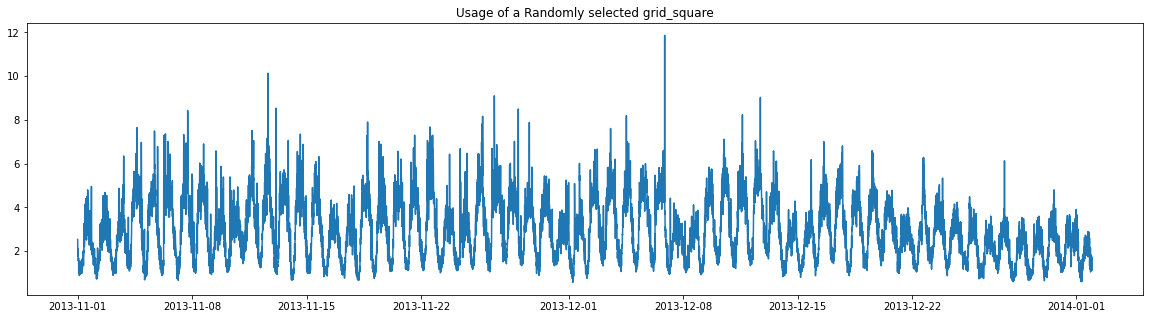

In [22]:
# pick Random Square
random_grid = np.random.choice(grids)
g1 = full_grid.get_group(random_grid)

#Plot
fig, ax = plt.subplots(figsize = (20,5))
ax.set_title("Usage of a Randomly selected grid_square")
ax.plot(g1["time"],g1["internet_cdr"])

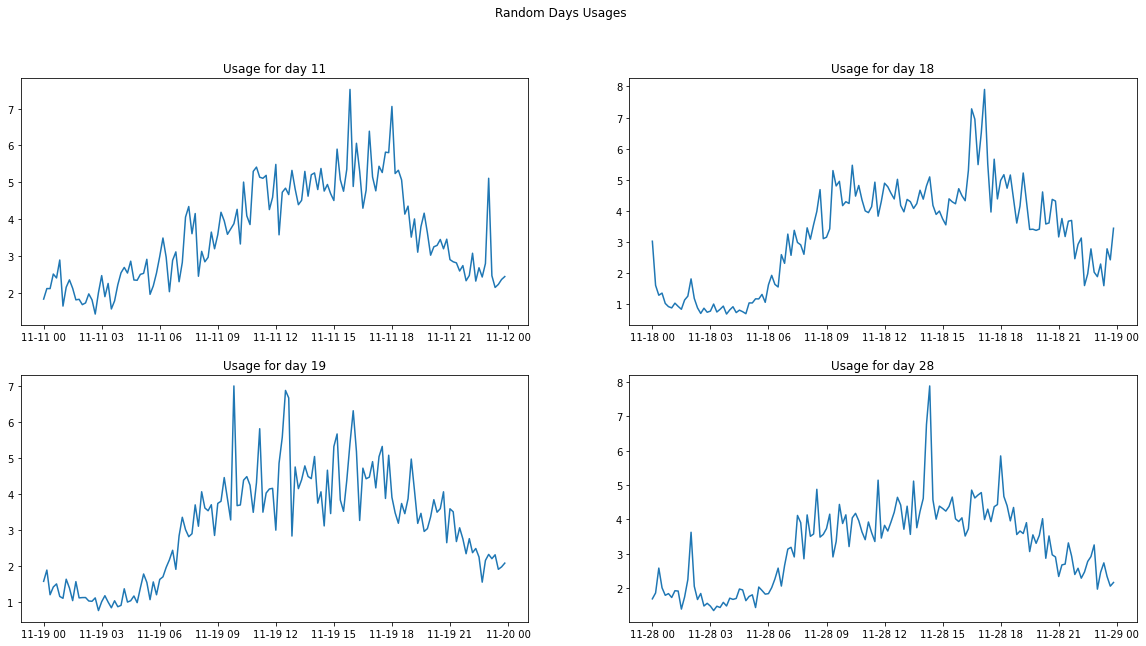

In [23]:
#Random Days
random_days = np.random.randint(1,30,4)

fig, axs = plt.subplots(2,2, figsize = (20,10))
fig.suptitle("Random Days Usages")
for i, day in enumerate(random_days):
    g2 = g1[g1["time"].dt.day == day][:144]
    axs[int(i/2),i%2].set_title("Usage for day {}".format(day))
    axs[int(i/2),i%2].plot(g2["time"], g2["internet_cdr"])


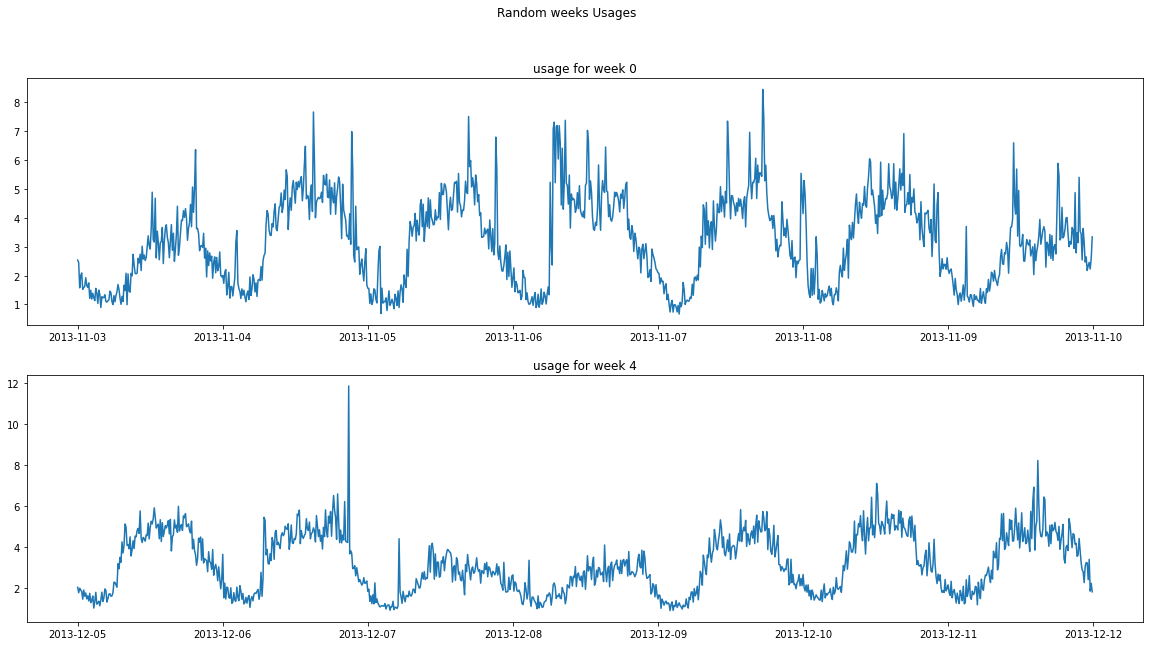

In [24]:
#Random Weeks:
weeks_starts = np.random.randint(1,55,2)

fig, axs = plt.subplots(2,1, figsize=(20,10))
fig.suptitle("Random weeks Usages")
for i, day in enumerate(weeks_starts):
    g3 = g1[day*144:day*144+1008]
    week_num = int(day/7)
    axs[i%2].set_title("usage for week {}".format(week_num))
    axs[i%2].plot(g3["time"], g3["internet_cdr"])

<BarContainer object of 1275 artists>

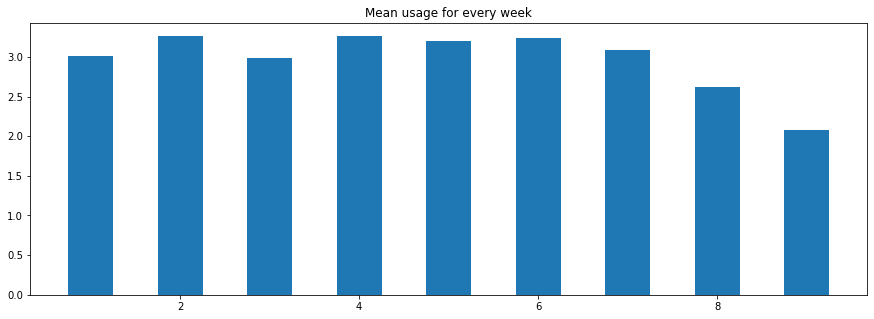

In [25]:
# Weeks Means:
num_weeks = int(len(g1) / 7)
weeks_means = {}
for week in range(num_weeks):
    g4 = g1[week*1008:(week+1)*1008]
    weeks_means[week+1] = g4["internet_cdr"].mean()

fig, ax = plt.subplots(figsize = (15,5))
ax.set_title("Mean usage for every week")
ax.bar(list(weeks_means.keys()), list(weeks_means.values()), width = 0.5)

In [26]:
# Usage over grids
bin_size = int(num_grids/5)
bin_mean = []
bin_indeces = []

for i in range(5):
    bin_indeces.append((i+1)*(bin_size))
means_grid_usage = []
for grid in grids:
    mean_int_usage = full_grid.get_group(grid)[["internet_cdr"]].mean()[0]
    means_grid_usage.append(mean_int_usage)
for i, bin_ in enumerate(bin_indeces):
    bin_mean.append(np.mean(means_grid_usage[i*bin_size:(i*bin_size)+bin_size]))

In [27]:
len(means_grid_usage)

10000

Text(0.5, 1.0, 'Mean internet Usage for all grids')

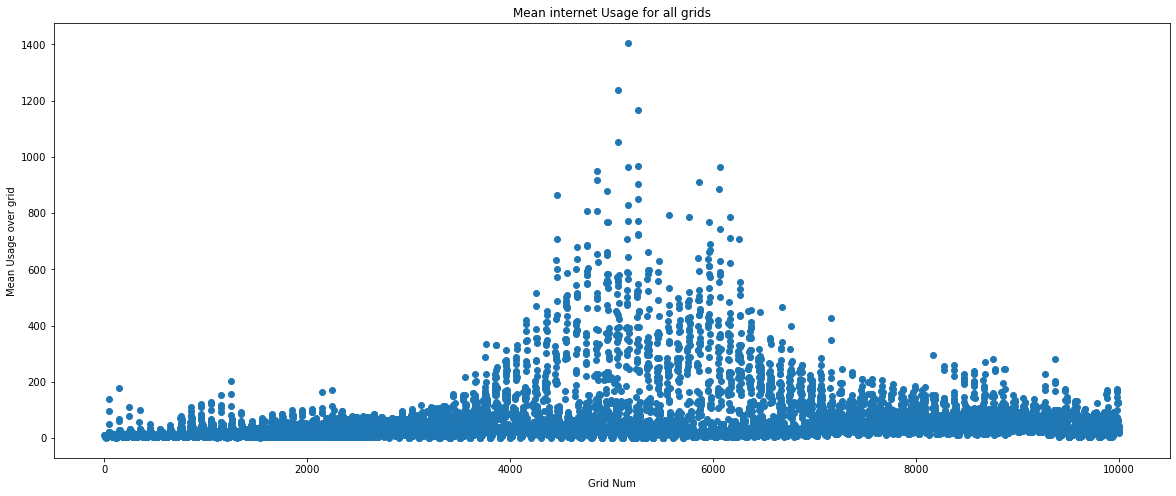

In [28]:
# Is ther is a relation between the usage and the grid square num ?
plt.figure(figsize = (20,8))
plt.scatter(x = grids, y = means_grid_usage);
plt.xlabel('Grid Num')
plt.ylabel('Mean Usage over grid')
plt.title('Mean internet Usage for all grids')

### We can see that the usage in the middle grids is more than the thers grids 

In [29]:
bin_indeces

[2000, 4000, 6000, 8000, 10000]

In [30]:
bin_mean

[16.920469692345115,
 40.21956055348202,
 119.95695210443263,
 78.28422341685133,
 54.92163815760333]

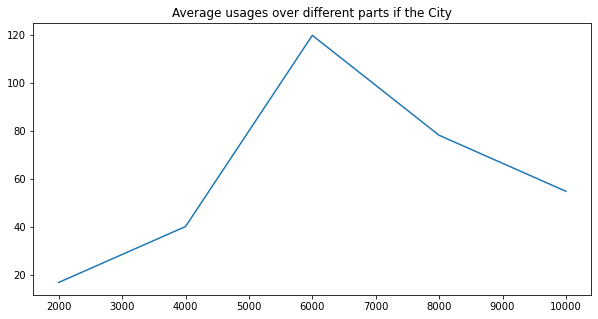

In [31]:
# fig, ax = plt.subplots(figsize=(10,5))
plt.figure(figsize  = (10,5))
plt.title("Average usages over different parts if the City")
plt.plot(list(bin_indeces), list(bin_mean))

As Expected the middle grids has more internet usage than the others

In [32]:
npara = np.reshape(np.array(means_grid_usage), (100,100))

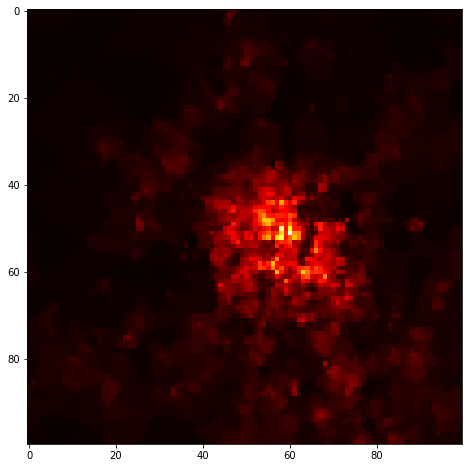

In [37]:
plt.figure(figsize = (8,8))
plt.imshow(npara, cmap='hot', interpolation='nearest')
plt.show()